In [59]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from LRT_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [60]:
### Main function ###
def main():
    per = 3
    opt_allele = 10
    model = 'euro_p2'
    
    # ABC parameters
    constant_het = 0.005
    denom_het = 3
    constant_common = 1
    denom_common = 4
    eps_bins = 0.3
    num_bins = 7
    use_het = 'y'
    use_common = 'n'
    use_bins = 'y'
    s = 0.01
    
    # LRT parameters
    LRT_num_sims = 200
    
    lrtFile = '/gymreklab-tscc/bonnieh/lrt/results/' + 'euro_prelim' + '/' + str(per) + '_' + str(opt_allele) + '_freqs.txt'
    freqs_list_raw = GetLRTListFreq(lrtFile, s)
            
    freq_string = freqs_list_raw[0]
    obs_het, obs_common, obs_bins = GetSummStats(freq_string, num_bins)
        
    abcFile = '/gymreklab-tscc/bonnieh/abc/results/' + model +'/' + str(per) + '_' + str(opt_allele) + '.txt' 
          
    # Read line by line and place in lookup table in the form of a list
    abc_list = GetABCList(abcFile, num_bins)
    
    # Perform ABC
    s_ABC, lower_bound, upper_bound, num_accepted, s_accepted = Get_S_ABC(abc_list, \
                                       obs_het, obs_common, obs_bins, constant_het, \
                                       denom_het, constant_common, denom_common, eps_bins, use_het, \
                                       use_common, use_bins)
    
    print("Number s accepted: " + str(len(s_accepted)))    
    print("s_ABC: " + str(s_ABC))
    ABC_conf_int = '(' + str(lower_bound) + ',' + str(upper_bound) + ')'
    print('ABC confidence interval: ' + ABC_conf_int)
    
    # Plot ABC acceptances    
    plt.figure(1)
    plt.hist(s_accepted, bins=50, weights=np.ones(len(s_accepted)) / len(s_accepted))
    plt.xlabel("S", size=15)
    plt.ylabel("Density", size=15) #Number of accepted S
    plt.axvline(x=s_ABC, color="red", label = 'Median')
    plt.axvline(x=lower_bound, color="green", label="95% confidence")
    plt.axvline(x=upper_bound, color="green")
    plt.legend()
    plt.title("Posterior distribution on s\nPeriod %d Optimal allele %d\nSumm stats used: het (%s) binned alleles (%s)\ns used for simulation: %.5f"%(per, opt_allele, use_het, use_bins, s),size=15)
    plt.xticks(fontsize=15, rotation=45) # rotation=90
    plt.yticks(fontsize=15)
    plt.savefig('/storage/BonnieH/selection_project/validation_per_locus/figures/post_distr_s_fig_2a.pdf',bbox_inches='tight')
    plt.show()
    
    lrtFile = '/gymreklab-tscc/bonnieh/lrt/results/' + 'euro_prelim' + '/' + str(per) + '_' + str(opt_allele) + '_freqs.txt'
    s_ABC_round = get_LRT_bin(s_ABC)
    # Get LRT summary statistic tables for s = 0
    freqs_list_raw_0 = GetLRTListFreq(lrtFile, 0)
    LRT_table_0_het = []
    LRT_table_0_common = []
    LRT_table_0_bins = []
    for freq_string in freqs_list_raw_0:
                
        obs_het_0, obs_common_0, obs_bins_0 = GetSummStats(freq_string, num_bins)
        LRT_table_0_het.append(obs_het_0) 
        LRT_table_0_common.append(obs_common_0) 
        LRT_table_0_bins.append(obs_bins_0)
    
    # Get LRT summary statistic tables for s = s_ABC
    freqs_list_raw_s = GetLRTListFreq(lrtFile, s_ABC_round)
            
    LRT_table_s_het = []
    LRT_table_s_common = []
    LRT_table_s_bins = []
    for freq_string in freqs_list_raw_s:
                    
        obs_het_s, obs_common_s, obs_bins_s = GetSummStats(freq_string, num_bins)
        LRT_table_s_het.append(obs_het_s) 
        LRT_table_s_common.append(obs_common_s) 
        LRT_table_s_bins.append(obs_bins_s)
        
    likelihood_0, likelihood_s_ABC, LR, LogLR, pval = LikelihoodRatioTest(LRT_table_0_het, LRT_table_s_het, \
                                LRT_table_0_common, LRT_table_s_common, LRT_table_0_bins, LRT_table_s_bins, LRT_num_sims, \
                                obs_het, obs_common, obs_bins, constant_het, denom_het, \
                                constant_common, denom_common, eps_bins, use_het, use_common, use_bins)
    print('Likelihood s = 0: ' + str(likelihood_0))
    print('Likelihood s = s_ABC: ' + str(likelihood_s_ABC))
    print('p value: ' + str(pval))
    
    # Plot LRT Using Only Heterozygosity
    '''
    fig = plt.figure(2)
    ax = fig.add_subplot(111)
    plt.hist(LRT_table_0_het, alpha = 0.5, color = 'blue', label = 's=0')
    plt.hist(LRT_table_s_het, alpha = 0.5, color = 'red', label = 's=' + str(s_ABC_round))
    plt.xlabel("Heterozygosity", size=15)
    plt.ylabel("Frequency", size=15)
    plt.axvline(x=obs_het, label='obs het')
    eps = GetEpsilonHet(obs_het, constant_het, denom_het)
    plt.axvline(x=obs_het + eps, linestyle = '--', label = 'obs het +/- epsilon')
    plt.axvline(x=obs_het - eps, linestyle = '--')
    string = 'Likelihood s=0: ' + str(likelihood_0) + '\nLikelihood:s=' + str(s_ABC_round) + ': ' +str(likelihood_s_ABC) + '\np val: ' + str(round(pval,3)) 
    ax.text(0.15, 0.8, string,transform=ax.transAxes, size=10)
    plt.legend()
    plt.title("Likelihood ratio test", size=15)
    #plt.savefig('/storage/BonnieH/selection_project/validation_per_locus/figures/LRT.pdf',bbox_inches='tight')
    '''

Number s accepted: 600
s_ABC: 0.010404869918297657
ABC confidence interval: (0.003898348496281811,0.018556997847180415)


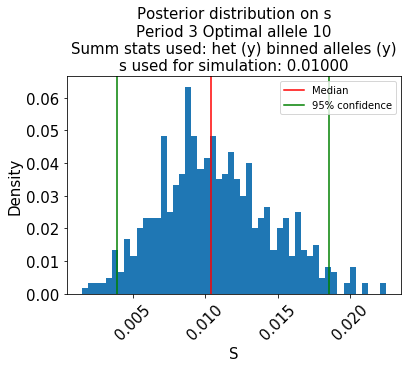

Likelihood s = 0: 0.005
Likelihood s = s_ABC: 0.89
p value: 0.0012852661892821479
CPU times: user 1.1 s, sys: 10.7 ms, total: 1.11 s
Wall time: 1.14 s


In [61]:
%%time
if __name__ == '__main__':
    main()